In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/saudi-aramco-stock-price-data/saudi_aramco_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
data = pd.read_csv("/kaggle/input/saudi-aramco-stock-price-data/saudi_aramco_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,29.090908,29.090908,29.090908,29.090908,24.556959,38289394
1,2019-12-12,31.983471,31.983471,29.752066,30.413223,25.673187,505692621
2,2019-12-15,30.661158,30.991735,30.413223,30.909090,26.091770,98349281
3,2019-12-16,30.991735,31.487602,30.991735,31.404959,26.510353,105973907
4,2019-12-17,31.446280,31.528925,30.991735,31.198347,26.335951,142672245


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1164 non-null   object 
 1   Open       1164 non-null   float64
 2   High       1164 non-null   float64
 3   Low        1164 non-null   float64
 4   Close      1164 non-null   float64
 5   Adj Close  1164 non-null   float64
 6   Volume     1164 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.8+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1.164000e+03
mean,30.502389,30.685119,30.314931,30.505042,28.200972,1.042249e+07
std,2.769039,2.801027,2.715085,2.756249,3.361246,2.646719e+07
min,22.314049,23.388430,22.314049,22.975206,19.394417,0.000000e+00
25%,28.836777,28.925619,28.680785,28.818180,25.978118,3.853885e+06
50%,29.628099,29.793388,29.504131,29.669420,27.945249,6.453034e+06
75%,32.349998,32.560226,32.200001,32.400002,31.083448,1.174389e+07
max,38.636364,39.409088,38.363636,38.636364,35.543354,6.562831e+08


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data = data.drop_duplicates()

In [8]:
data["Date"]=pd.to_datetime(data["Date"])

In [9]:
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Day of the month (1-31)
data['DayOfMonth'] = data['Date'].dt.day

# Month (1-12)
data['Month'] = data['Date'].dt.month

# Quarter (1-4)
data['Quarter'] = data['Date'].dt.quarter

# Year (e.g., 2019)
data['Year'] = data['Date'].dt.year

# Is Month End? (True/False)
data['IsMonthEnd'] = data['Date'].dt.is_month_end

# Is Year End? (True/False)
data['IsYearEnd'] = data['Date'].dt.is_year_end

In [10]:
data = data.drop('Date', axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1164 non-null   float64
 1   High        1164 non-null   float64
 2   Low         1164 non-null   float64
 3   Close       1164 non-null   float64
 4   Adj Close   1164 non-null   float64
 5   Volume      1164 non-null   int64  
 6   DayOfWeek   1164 non-null   int32  
 7   DayOfMonth  1164 non-null   int32  
 8   Month       1164 non-null   int32  
 9   Quarter     1164 non-null   int32  
 10  Year        1164 non-null   int32  
 11  IsMonthEnd  1164 non-null   bool   
 12  IsYearEnd   1164 non-null   bool   
dtypes: bool(2), float64(5), int32(5), int64(1)
memory usage: 79.7 KB


# Standardization (Z-Score Scaling) for Numerical Features

In [12]:
scaler = StandardScaler()
columns_to_standardize = ['Open','High','Low','Close','Adj Close','Volume']
data_standardized = data.copy()
data_standardized[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Normalization / Min-Max Scaling for Numerical Features

In [13]:
min_max_scaler = MinMaxScaler()
columns_to_normalize = ["Open","High","Low","Close","Adj Close","Volume"]

data_normalized = data.copy()
data_normalized[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

# Cyclical Encoding for Categorical Features like "Month" and "DayofWeek"

In [14]:
# Cyclical Encoding for Month
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

# Cyclical Encoding for DayOfWeek
data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)

# Combining everything

In [15]:
# Apply Standardization to numerical features
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Apply Cyclical Encoding to Month and DayOfWeek
data_standardized['Month_sin'] = np.sin(2 * np.pi * data_standardized['Month'] / 12)
data_standardized['Month_cos'] = np.cos(2 * np.pi * data_standardized['Month'] / 12)

data_standardized['DayOfWeek_sin'] = np.sin(2 * np.pi * data_standardized['DayOfWeek'] / 7)
data_standardized['DayOfWeek_cos'] = np.cos(2 * np.pi * data_standardized['DayOfWeek'] / 7)

data_standardized = data_standardized.drop(['Month', 'DayOfWeek'], axis=1)

In [16]:
y = data["Adj Close"]
x = data.drop(["Adj Close"], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.8)
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y,test_size = 0.8)
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,test_size = 0.8)

# Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
model01 = DecisionTreeRegressor()
model01.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
y_pred = model01.predict(x_test)

# Performance of model

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred):.3f}")
print(f"r2 Score: {r2_score(y_test,y_pred):.3f}")

MSE: 0.209
MAE: 0.295
r2 Score: 0.981


# Cross validation to check model performance on different subsets

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

print(f'Cross-Validated R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')


Cross-Validated R² Scores: [0.92789801 0.98340469 0.88090201 0.96315145 0.98708122]
Mean R² Score: 0.9484874754457715


# Prophet Model (Model building, Evaluation and Visualization)

Index(['ds', 'Open', 'High', 'Low', 'Close', 'y', 'Volume'], dtype='object')
ds        datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
y                float64
Volume             int64
dtype: object
ds    0
y     0
dtype: int64


16:47:03 - cmdstanpy - INFO - Chain [1] start processing
16:47:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 0.4224478043985417
Mean Squared Error (MSE): 0.20683271141658266
Root Mean Squared Error (RMSE): 0.4547886447753315
R² Score: 0.9395855405636181


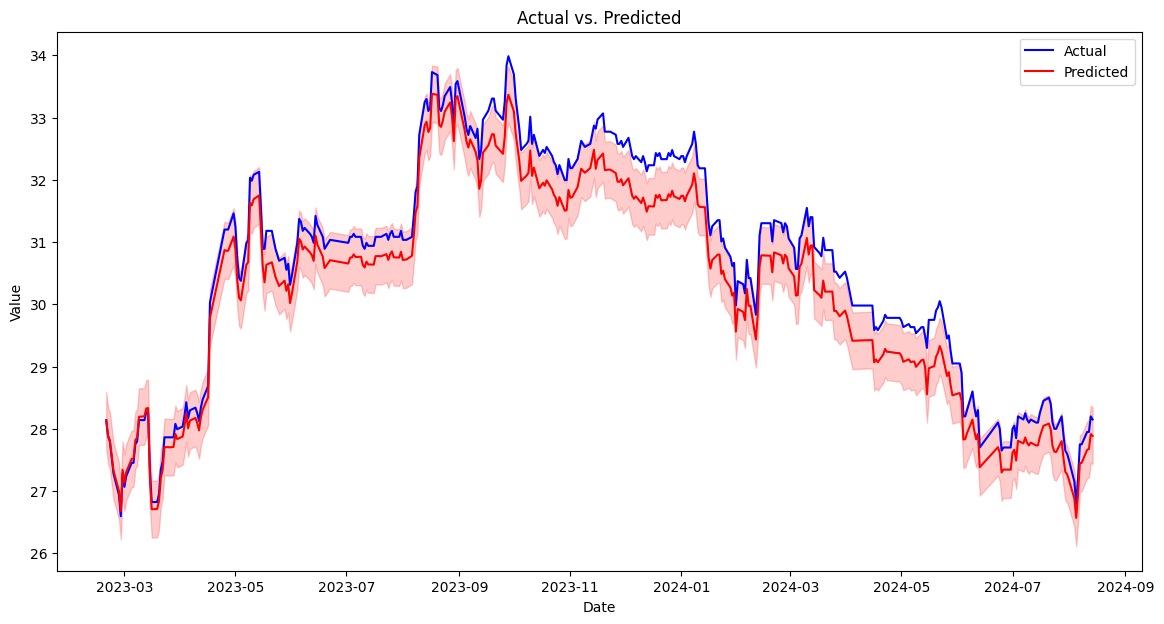

In [22]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/kaggle/input/saudi-aramco-stock-price-data/saudi_aramco_data.csv')

# Rename columns
data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Convert 'ds' to datetime format and 'y' to numeric
data['ds'] = pd.to_datetime(data['ds'])
data['y'] = pd.to_numeric(data['y'], errors='coerce')

# Check columns and data types
print(data.columns)
print(data.dtypes)
print(data[['ds', 'y']].isnull().sum())

# Split the data into training and testing sets
train = data.iloc[:-365]  # Training on all but last year
test = data.iloc[-365:]   # Testing on the last year

# Create and fit the Prophet model on training data
model = Prophet()

# Add additional regressors
for column in train.columns:
    if column not in ['ds', 'y']:
        model.add_regressor(column)

# Fit the model
model.fit(train)

# Create a DataFrame for future dates (test-period)
future = test[['ds']].copy()

# Add additional regressors to the future Data Frame
for column in test.columns:
    if column not in ['ds', 'y']:
        future[column] = test[column]

# Make the predictions
forecast = model.predict(future)

# Merge forecast with actual test values
forecast = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds', how='left')

# Evaluate the model accuracy
mae = mean_absolute_error(forecast['y'], forecast['yhat'])
mse = mean_squared_error(forecast['y'], forecast['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(forecast['y'], forecast['yhat'])

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

# Plot the forecast(predicted) against the actual values
plt.figure(figsize=(14, 7))
plt.plot(forecast['ds'], forecast['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat'] - rmse, forecast['yhat'] + rmse, color='red', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()
